Tiempo promedio en el sistema: 6.8294725401384495
Tiempo promedio de espera: 4.037868601706082
Tiempo promedio del servicio: 2.7515094590440152


Text(0, 0.5, 'Frecuencia')

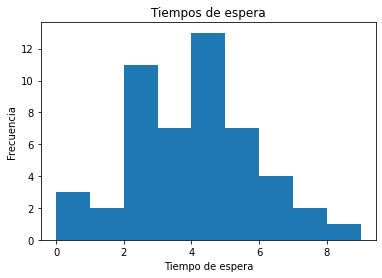

In [1]:
from random import random
import matplotlib.pyplot as plot

def tiempoLlegadas():
  while True:
    r1 = random()
    r2 = random()

    x = 2 + r1
    g = (4 * x**2 - 10) / 26

    if r2 <= g:
      return x

def tiempoServicio():
  r = random()

  if r <= 0.2:
    return uniforme(1, 2)
  elif r <= 0.55:
    return uniforme(2, 3)
  elif r <= 0.85:
    return uniforme(3, 4)
  else:
    return uniforme(4, 5)

def uniforme(a, b):
  r = random()
  return a + (b - a) * r

tiemposLlegadas = [0]
tiemposServicio = list()
tiemposSistema = list()
tiemposCola = [0]  
horasLlegada = [0]
horasFinalServicio = list()

# Genero 49 tiempos entre llegadas
for i in range(49):
  tiemposLlegadas.append(tiempoLlegadas())

# Genero 50 tiempos de servicio
for i in range(50):
  tiemposServicio.append(tiempoServicio())

# Calculo la hora de llegada de cada cliente
for i in range(49):
  horasLlegada.append(horasLlegada[-1] + tiemposLlegadas[i + 1])

horasFinalServicio.append(tiemposServicio[0])
# calculo 49 tiempos de cola, calculo los tiempos en el sistema y calculo las horas finales del servicio
for i in range(49):
  tminimo = min(horasFinalServicio[i], horasLlegada[i + 1])
  tiemposCola.append(horasFinalServicio[i] - tminimo)
  tiemposSistema.append(tiemposCola[i + 1] + tiemposServicio[i + 1])
  horasFinalServicio.append(horasLlegada[i + 1] + tiemposCola[i + 1] 
                         + tiemposServicio[i + 1])

print(f'Tiempo promedio en el sistema: {sum(tiemposSistema)/len(tiemposSistema)}')
print(f'Tiempo promedio de espera: {sum(tiemposCola)/len(tiemposCola)}')
print(f'Tiempo promedio del servicio: {sum(tiemposServicio)/len(tiemposServicio)}')
intervalos = range(int(min(tiemposCola)), int(max(tiemposCola)) + 2)
plot.hist(x = tiemposCola, bins = intervalos)
plot.title('Tiempos de espera')
plot.xlabel('Tiempo de espera')
plot.ylabel('Frecuencia')